# ABOUT


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* Hélène ASSIR
* Hichem HADJI  
* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
1.5     | 04/10/2022 | H.A.       | Add Hichem best model selection
1.4     | 20/09/2022 | H.A.       | Plot title with \n . Order labels in plots
1.3     | 15/09/2022 | H.A.       | Color coding for Frozen/Unrozen BERT & Figure size automatically scaled  
1.2     | 15/09/2022 | H.A./I.S.  | Specific plot for BERT 
1.1     | 13/09/2022 | H.A./I.S.  | Plots all models (1vs all/multilabel)
1.0     | 24/08/2022 | H.A.       | Plots metrics by model with dataviz

# IMPORT PACKAGES


In [ ]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline


###############################
# Other
###############################
import pickle as pkl # Saving data externally

# LOAD DATA

## Mount GDrive

In [ ]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content/drive/My Drive/data/saved models/Yannis/BERT'

In [ ]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/transformed/

/content/drive/MyDrive/data/transformed


In [ ]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 2022_09_11_7_4_3_raw_narr_BERT_BASE_frozen_max_length_345.pkl
 complaints-2022-08-05_13_55.csv
'Copy of Qualified abbreviations_20220718.xlsx.gsheet'
'Data Dictionnary.xlsx'
 data_for_BERT_multilabel_20220805.pkl
 logs
 model.png
 model_results
 Narrative_PP_stemmed_24072022_TRAIN.pkl
 Narrative_Raw_Stemmed_24072022_TRAIN.pkl
 Narrative_RegEx_subst_21072022_TRAIN.pkl
'Qualified abbreviations_20220707_test.csv'
'Qualified abbreviations_20220708.csv'
'Qualified abbreviations_20220718.csv'
'Qualified abbreviations_20220718_Google_sheet.gsheet'
 test_data_final.pkl
 train_data_final.pkl





## Load 1 VS ALL dataframes from .pkl file 
- 1 vs all  classification report format


In [ ]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection/

filename_list = [
                 'df_metrics_DT_PP.pkl', 
                    'df_metrics_DT_PP_Impce_1000.pkl',
                    'df_metrics_DT_PP_Impce_750.pkl',
                    'df_metrics_DT_PP_Impce_500.pkl',
                    'df_metrics_DT_PP_Impce_250.pkl',
                    'df_metrics_DT_PP_Impce_100.pkl',
                    'df_metrics_DT_PP_Impce_50.pkl',
                    'df_metrics_DT_PP_Impce_30.pkl',
                    'df_metrics_DT_PP_Impce_20.pkl',
                  'df_metrics_GB_PP_RN_MDF.pkl',   
                    'df_metrics_GB_PP_Impce_1000.pkl',
                    'df_metrics_GB_PP_Impce_750.pkl',
                    'df_metrics_GB_PP_Impce_500.pkl',
                    'df_metrics_GB_PP_Impce_250.pkl',
                    'df_metrics_GB_PP_Impce_100.pkl',
                    'df_metrics_GB_PP_Impce_50.pkl',
                    'df_metrics_GB_PP_Impce_30.pkl',
                    'df_metrics_GB_PP_Impce_20.pkl',
                'df_metrics_GB_PP_US_RN_MDF.pkl', 
                    'df_metrics_GB_PP_US_Impce_1000.pkl',
                    'df_metrics_GB_PP_US_Impce_750.pkl',
                    'df_metrics_GB_PP_US_Impce_500.pkl',
                    'df_metrics_GB_PP_US_Impce_250.pkl',
                    'df_metrics_GB_PP_US_Impce_100.pkl',
                    'df_metrics_GB_PP_US_Impce_50.pkl',
                    'df_metrics_GB_PP_US_Impce_30.pkl',
                    'df_metrics_GB_PP_US_Impce_20.pkl',
               'df_metrics_RF_PP_RN_MDF.pkl', 
                    'df_metrics_RF_PP_Impce_1000.pkl',
                    'df_metrics_RF_PP_Impce_750.pkl',
                    'df_metrics_RF_PP_Impce_500.pkl',
                    'df_metrics_RF_PP_Impce_250.pkl',
                    'df_metrics_RF_PP_Impce_100.pkl',
                    'df_metrics_RF_PP_Impce_50.pkl',
                    'df_metrics_RF_PP_Impce_30.pkl',
                    'df_metrics_RF_PP_Impce_20.pkl',
                 'df_metrics_RF_PP_US_RN_MDF.pkl',
                    'df_metrics_RF_PP_US_Impce_1000.pkl',
                    'df_metrics_RF_PP_US_Impce_750.pkl',    
                    'df_metrics_RF_PP_US_Impce_500.pkl',                                                                   
                    'df_metrics_RF_PP_US_Impce_250.pkl',
                    'df_metrics_RF_PP_US_Impce_100.pkl',
                    'df_metrics_RF_PP_US_Impce_50.pkl',
                    'df_metrics_RF_PP_US_Impce_30.pkl',
                    'df_metrics_RF_PP_US_Impce_20.pkl',

                 'metrics_WordEmbedding_PP_20220727_2200.pkl'
                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_1vsall = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_1vsall = model_results_1vsall.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection
Files ['df_metrics_DT_PP.pkl', 'df_metrics_DT_PP_Impce_1000.pkl', 'df_metrics_DT_PP_Impce_750.pkl', 'df_metrics_DT_PP_Impce_500.pkl', 'df_metrics_DT_PP_Impce_250.pkl', 'df_metrics_DT_PP_Impce_100.pkl', 'df_metrics_DT_PP_Impce_50.pkl', 'df_metrics_DT_PP_Impce_30.pkl', 'df_metrics_DT_PP_Impce_20.pkl', 'df_metrics_GB_PP_RN_MDF.pkl', 'df_metrics_GB_PP_Impce_1000.pkl', 'df_metrics_GB_PP_Impce_750.pkl', 'df_metrics_GB_PP_Impce_500.pkl', 'df_metrics_GB_PP_Impce_250.pkl', 'df_metrics_GB_PP_Impce_100.pkl', 'df_metrics_GB_PP_Impce_50.pkl', 'df_metrics_GB_PP_Impce_30.pkl', 'df_metrics_GB_PP_Impce_20.pkl', 'df_metrics_GB_PP_US_RN_MDF.pkl', 'df_metrics_GB_PP_US_Impce_1000.pkl', 'df_metrics_GB_PP_US_Impce_750.pkl', 'df_metrics_GB_PP_US_Impce_500.pkl', 'df_metrics_GB_PP_US_Impce_250.pkl', 'df_metrics_GB_PP_US_Impce_100.pkl', 'df_metrics_GB_PP_US_Impce_50.pkl', 'df_metrics_GB_PP_US_Impce_30.pkl', 'df_metrics_GB_PP_US_Im

In [ ]:
# Check of the df length ; for each model : must contain 4 metrics rows for each of the 14 anomalies 
print('Check of df size :',len(model_results_1vsall), ' must be equal to ',14*4*len(filename_list))

Check of df size : 2576  must be equal to  2576


In [ ]:
model_results_1vsall.head()


classifier      preprocessing  undersampling Count_Vectorizer_opts  \
0  Decision Tree  1              0              NaN                    
1  Decision Tree  1              0              NaN                    
2  Decision Tree  1              0              NaN                    
3  Decision Tree  1              0              NaN                    
4  Decision Tree  1              0              NaN                    

  anomaly                                       metric      0            \
0  Anomaly_Deviation / Discrepancy - Procedural  precision     0.647695   
1  Anomaly_Deviation / Discrepancy - Procedural     recall     0.471537   
2  Anomaly_Deviation / Discrepancy - Procedural   f1-score     0.545753   
3  Anomaly_Deviation / Discrepancy - Procedural    support  7747.000000   
4                    Anomaly_Aircraft Equipment  precision     0.848105   

   1             accuracy  macro avg     weighted avg  
0      0.702428  0.686514      0.675061      0.680569  
1      0.829457  0.686514      0.650497      0.686514  
2      0.760675  0.686514      0.653214      0.674842  
3  11651.000000  0.686514  19398.000000  19398.000000  
4      0.816620  0.836581      0.832363      0.835662

### Transform in Common format : 

In [ ]:
# label of the model , including options
model_results_1vsall['model_label']=model_results_1vsall['classifier']+'/'+model_results_1vsall['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP')+'/'+model_results_1vsall['undersampling'].apply(lambda x: 'Std sampling' if x==0 else 'Under sampling') +'/'+model_results_1vsall['Count_Vectorizer_opts'].apply(lambda x: '' if str(x)=='nan' else str(x))
      

In [ ]:
model_results_1vsall_select=model_results_1vsall[['model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

In [ ]:
model_results_1vsall_select.head()

model_label                     classifier      preprocessing  \
0  Decision Tree/PP/Std sampling/  Decision Tree  1               
1  Decision Tree/PP/Std sampling/  Decision Tree  1               
2  Decision Tree/PP/Std sampling/  Decision Tree  1               
3  Decision Tree/PP/Std sampling/  Decision Tree  1               
4  Decision Tree/PP/Std sampling/  Decision Tree  1               

   undersampling anomaly                                       metric      \
0  0              Anomaly_Deviation / Discrepancy - Procedural  precision   
1  0              Anomaly_Deviation / Discrepancy - Procedural     recall   
2  0              Anomaly_Deviation / Discrepancy - Procedural   f1-score   
3  0              Anomaly_Deviation / Discrepancy - Procedural    support   
4  0                                Anomaly_Aircraft Equipment  precision   

   1             
0      0.702428  
1      0.829457  
2      0.760675  
3  11651.000000  
4      0.816620

## Load MULTILABEL BERT DataFrames from .pkl files
- Multilabel classification report / word embedding options format
- Adapted for BERT experiments

In [ ]:
def get_filenames_in_BERT_dir(dir, namepart, extension = '.pkl', include_path = False):
  '''
  - Search through all subfolders of dir and find all .pkl files 
  that correspond to the classification report in pandas.DataFrame format, 
  issued from BERT experiments. Use namepart = 'clf_rep_df'
  
  - Return a list with their full filenames
  
  Input: 
  ------
  - directory
  - namepart: string that should be contained in the filename. 'None' if not applicable
  - file extension type
  - include_path: whether to include the entire path in the filename; default: False
  
  Return:
  ------
  - list of .pkl filenames
  '''
  import os
  files_to_import = []
  # traverse whole directory
  for root, dirs, files in os.walk(dir):
      # select file name
      for file in files:
          # select only filenames containing 'namepart'
          if namepart != None:
            if namepart in str(file):
              # check the extension of files
              if file.endswith(extension):
                if include_path == True:
                  files_to_import.append(os.path.join(root, file)) # print whole path of files
                else:  
                  files_to_import.append(os.path.join('', file))
          
          else: # namepart = None
            # check the extension of files
              if file.endswith(extension):
                if include_path == True:
                  files_to_import.append(os.path.join(root, file)) # print whole path of files
                else:  
                  files_to_import.append(os.path.join('', file))

  return files_to_import

In [ ]:
# Import DataFrames into a list 'files_to_import'
dir = '/content/drive/MyDrive/data/saved models/Yannis/BERT/'
%cd $dir
# the '$' extracts the value from the string. Don't put any comments in the line above

files_to_import = get_filenames_in_BERT_dir(dir, namepart = 'clf_rep_df', extension = '.pkl', include_path = True)
# include_path = True, because the files are located in different subfolders

print('\nFiles found:')
for filename in files_to_import:
  print(filename)

/content/drive/MyDrive/data/saved models/Yannis/BERT

Files found:
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_1_concat_last4_layers_frozen/clf_rep_df_2022_09_12_7_5_1_concat_last4_layers_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_2_concat_last4_layers_UNfrozen/clf_rep_df_2022_09_12_7_5_2_concat_last4_layers_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen/clf_rep_df_2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR/clf_rep_df_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen/clf_rep_df_2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_2_2_concat_laye

In [ ]:
# Combine all DataFrames into one, named 'model_results'
df_list = []

print(f"Files loaded:")
for filename in files_to_import:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file) 
    print(filename)

model_results_multilabel_BERT = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel_BERT = model_results_multilabel_BERT.reset_index().drop(columns =['index'])

Files loaded:
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_1_concat_last4_layers_frozen/clf_rep_df_2022_09_12_7_5_1_concat_last4_layers_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_2_concat_last4_layers_UNfrozen/clf_rep_df_2022_09_12_7_5_2_concat_last4_layers_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen/clf_rep_df_2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR/clf_rep_df_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen/clf_rep_df_2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_2_2_concat_layers_8_9_10_11_UNfrozen/clf_rep_df_2022_09_12_7_5_2_2_c

In [ ]:
# For compatibility with the function below, rename the 'values' column into 'macro avg'
model_results_multilabel_BERT = model_results_multilabel_BERT.rename(columns = {'values': '1'})

In [ ]:
model_results_multilabel_BERT.head(5)

experiment_ID classifier preprocessing  undersampling UNfrozen_layers  \
0  7_5_1         BERT_BASE  raw           0              NO               
1  7_5_1         BERT_BASE  raw           0              NO               
2  7_5_1         BERT_BASE  raw           0              NO               
3  7_5_1         BERT_BASE  raw           0              NO               
4  7_5_1         BERT_BASE  raw           0              NO               

  concat_layers comments anomaly                     metric      1            
0  9_10_11_12             Anomaly_Aircraft Equipment  precision     0.719547  
1  9_10_11_12             Anomaly_Aircraft Equipment     recall     0.754370  
2  9_10_11_12             Anomaly_Aircraft Equipment   f1-score     0.736547  
3  9_10_11_12             Anomaly_Aircraft Equipment    support  7666.000000  
4  9_10_11_12             Anomaly_Airspace Violation  precision     1.000000

In [ ]:

# Sort BERT df according to model 'UNfrozen_layers','preprocessing','concat_layers' to display plots in 
model_results_multilabel_BERT = model_results_multilabel_BERT.sort_values(by = ['UNfrozen_layers','preprocessing','concat_layers'], ascending = False)

### Transform in Common format : 

In [ ]:
# # Create a long label of the model by concatenating the various options into a string
# model_results_multilabel_BERT['model_label'] =                                                                       \
#                             + model_results_multilabel_BERT['experiment_ID']                                         \
#                             + '_' + model_results_multilabel_BERT['classifier']                                      \
#                             + '_' + model_results_multilabel_BERT['preprocessing']                                   \
#                             + '_' + 'UNfrozen_layers_' + model_results_multilabel_BERT['UNfrozen_layers']            \
#                             + '_' + 'concat_layers_'   + model_results_multilabel_BERT['concat_layers']              \
#                             + '_' + model_results_multilabel_BERT['comments']                                        \
# Create a long label of the model by concatenating the various options into a string

# Simplified model label where : "UNfrozen_layers_NO"  becomes "FROZEN"
model_results_multilabel_BERT['model_label'] =                                                                       \
                            + model_results_multilabel_BERT['experiment_ID']                                         \
                            + '_' + model_results_multilabel_BERT['classifier']                                      \
                            + '_' + model_results_multilabel_BERT['preprocessing']                                   \
                            + '_' + model_results_multilabel_BERT['UNfrozen_layers'].apply(lambda x: 'FROZEN' if x=='NO' else 'UNfrozen_layers_' +x) \
                            + '_' + 'concat_layers_'   + model_results_multilabel_BERT['concat_layers']              \
                            + '_' + model_results_multilabel_BERT['comments']                                        \

# Optional : We split BERT Classifier into FROZEN or UNFROZEN
model_results_multilabel_BERT['classifier']=model_results_multilabel_BERT['classifier'] + model_results_multilabel_BERT['UNfrozen_layers'].apply(lambda x : ' FROZEN' if x =='NO' else ' UNFROZEN') 

# Select the 
#select = model_results_multilabel_BERT[['model_label','anomaly','metric','1']]
model_results_multilabel_BERT_select = model_results_multilabel_BERT[['model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

## Load MULTILABEL WordEmbedding DataFrames from .pkl files
- Multilabel  classification report / word embedding options format

In [ ]:
def get_filenames_in_dir(dir, extension = '.pkl', include_path = False):
  '''
  Find all .pkl (or other format's) files in the directory and create a list with their names
  
  Input: 
  - directory
  - file extension type
  - include_path: whether to include the entire path in the filename; default: False
  
  Return:
  - list of .pkl
  '''
  import os
  files_to_import = []
  # traverse whole directory
  for root, dirs, files in os.walk(dir):
      # select file name
      for file in files:
          # check the extension of files
          if file.endswith(extension):
            if include_path == True:
              files_to_import.append(os.path.join(root, file)) # print whole path of files
            else:  
              files_to_import.append(os.path.join('', file))
  
  return files_to_import

In [ ]:
# Import DataFrames into a list 'files_to_import'
dir = '/content/drive/MyDrive/data/saved models/Yannis/2022_08_19_WordEmbedding_Multilabel_PADDING_tests/'
%cd $dir
# the '$' extracts the value from the string. Don't put any comments in the line above

files_to_import = get_filenames_in_dir(dir, extension = '.pkl', include_path = False)

/content/drive/MyDrive/data/saved models/Yannis/2022_08_19_WordEmbedding_Multilabel_PADDING_tests


In [ ]:
# # Manually select the files to import
# # e.g. if you want to plot only specific models

# files_to_import = [\
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_20000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_20000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl'
#  ]

In [ ]:
# Combine all DataFrames into one, named 'model_results'

df_list = []

for filename in files_to_import:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[3]) # [3] corresponds to clf_rep_df (classification report in pd.DataFrame format)

print(f"Files {files_to_import} loaded")
  
model_results_multilabel = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel = model_results_multilabel.reset_index().drop(columns =['index'])

Files ['2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmb

In [ ]:
# For compatibility with the function below, rename the 'values' column into 'macro avg'
model_results_multilabel = model_results_multilabel.rename(columns = {'values': '1'})

In [ ]:
model_results_multilabel.head(5)

classifier       preprocessing  undersampling anomaly                      \
0  Word_Embedding  1              0              Anomaly_Aircraft Equipment   
1  Word_Embedding  1              0              Anomaly_Aircraft Equipment   
2  Word_Embedding  1              0              Anomaly_Aircraft Equipment   
3  Word_Embedding  1              0              Anomaly_Aircraft Equipment   
4  Word_Embedding  1              0              Anomaly_Airspace Violation   

   num_words  maxlen padding truncating metric      1            
0  3000       200     post    post       precision     0.877740  
1  3000       200     post    post          recall     0.851291  
2  3000       200     post    post        f1-score     0.864314  
3  3000       200     post    post         support  7666.000000  
4  3000       200     post    post       precision     0.805112

### Transform in Common format : 

In [ ]:
# label of the model , including options
model_results_multilabel['model_label'] =                                                                            \
                            model_results_multilabel['classifier']                                                   \
                            + '_'                                                                                    \
                            + model_results_multilabel['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP')     \
                            + '_'                                                                                    \
                            + model_results_multilabel['maxlen'].apply(lambda x: '' if x == np.nan else 'maxlen:' + str(x))            \
                            + '_'                                                                                    \
                            + model_results_multilabel['num_words'].apply(lambda x: '' if x == np.nan else 'vocab_size:' + str(x))     \
                            + '_'+model_results_multilabel['padding'].apply(lambda x: '' if str(x)=='nan' else 'pad:'+ str(x).upper()) \
                            + '_'+model_results_multilabel['truncating'].apply(lambda x: '' if str(x)=='nan' else 'trunc:'+ str(x).upper())

model_results_multilabel_select = model_results_multilabel[['model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

# Concatenate 1 VS ALL, WordEmbedding (multilabel), BERT (multilabel)

In [ ]:
model_results = pd.concat([
                          model_results_1vsall_select, 
                          model_results_multilabel_select,
                          model_results_multilabel_BERT_select
                          ], 
                          axis=0)

In [ ]:
print(len(model_results_1vsall_select))
print(len(model_results_multilabel_select))
print(len(model_results_multilabel_BERT_select))

print(len(model_results))

2576
784
560
3920


# Plot of F1 score (Macro avg) 

#### Function plot_metric 

In [ ]:
def plot_metric_universal(df_model_results,anomaly_list=[],metric="f1-score",dict_model_color={}):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics : "precision", "recall", "f1-score" or "support"
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
    
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    if anomaly_list==[] :
      anomaly_list=df_model_results['anomaly'].unique().tolist()
    for anomaly in anomaly_list :
  
      # Anomaly_label without the prefix "Anomaly_"
      anomaly_label=anomaly.replace("Anomaly_", "")  
      
      # Dealing with rows and columns to use according to the metric choice (accuracy is a column not a row) + graph title
      # if metric=="accuracy":
      #   modality_col="accuracy"
      #   metric_row="support"
      #   title_ToPlot=anomaly_label+" :  accuracy"
      # elif modality=="macro avg":
      #    modality_col=modality
      #    metric_row=metric
      #    title_ToPlot=anomaly_label+" :  "+ metric+"(macro avg)"
      # else :
      modality_col='1'
      metric_row=metric
      title_ToPlot=anomaly_label+" :\n  "+ metric+" (modality=1) "



      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['anomaly'] == anomaly) & (df_model_results['metric'] == metric_row)] .copy()
      # label of the model , including options
      sub_df=sub_df.set_index('model_label')
      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
      sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
      sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)
      
      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize

      
      num_classes = len(sub_df)
      fig_shape=(8,num_classes//4)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=fig_shape) # indicative value for BERT models only: (8,7)
      if metric!="support":
        plt.xlim([0,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                  " "+str(round(v*100,1))+"%", 
                  color=c, 
                  va='center', 
                  fontweight='bold')
      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')


#### Plotting f1-score macro avg for each anomaly

In [ ]:
# Definition of color coding for each model type (grey otherwise in function)
dict_model_color={'Decision Tree':'#15B01A' , 
            'Random Forest':'#008080' , 
            'Gradient Boosting':'#16a3e0' , 
            'SVM':'#162d5a' , 
            'Neural Network':'#f14124' , 
            'Word_Embedding':'#962c61',
            'BERT_BASE': '#f14124',
            'BERT_BASE UNFROZEN': '#f14124',
            'BERT_BASE FROZEN': '#766d6b',
            }

##### Example for all anomalies, 1 metric

###### f1-score

In [ ]:
plot_metric_universal(df_model_results = model_results,
                      metric = "f1-score",
                      dict_model_color = dict_model_color)

###### Recall

In [ ]:
plot_metric_universal(df_model_results = model_results,
                      metric = "recall",
                      dict_model_color = dict_model_color)

###### Precision

In [ ]:
plot_metric_universal(df_model_results = model_results,
                      metric = "precision",
                      dict_model_color = dict_model_color)

##### Example for 1 anomaly all metrics

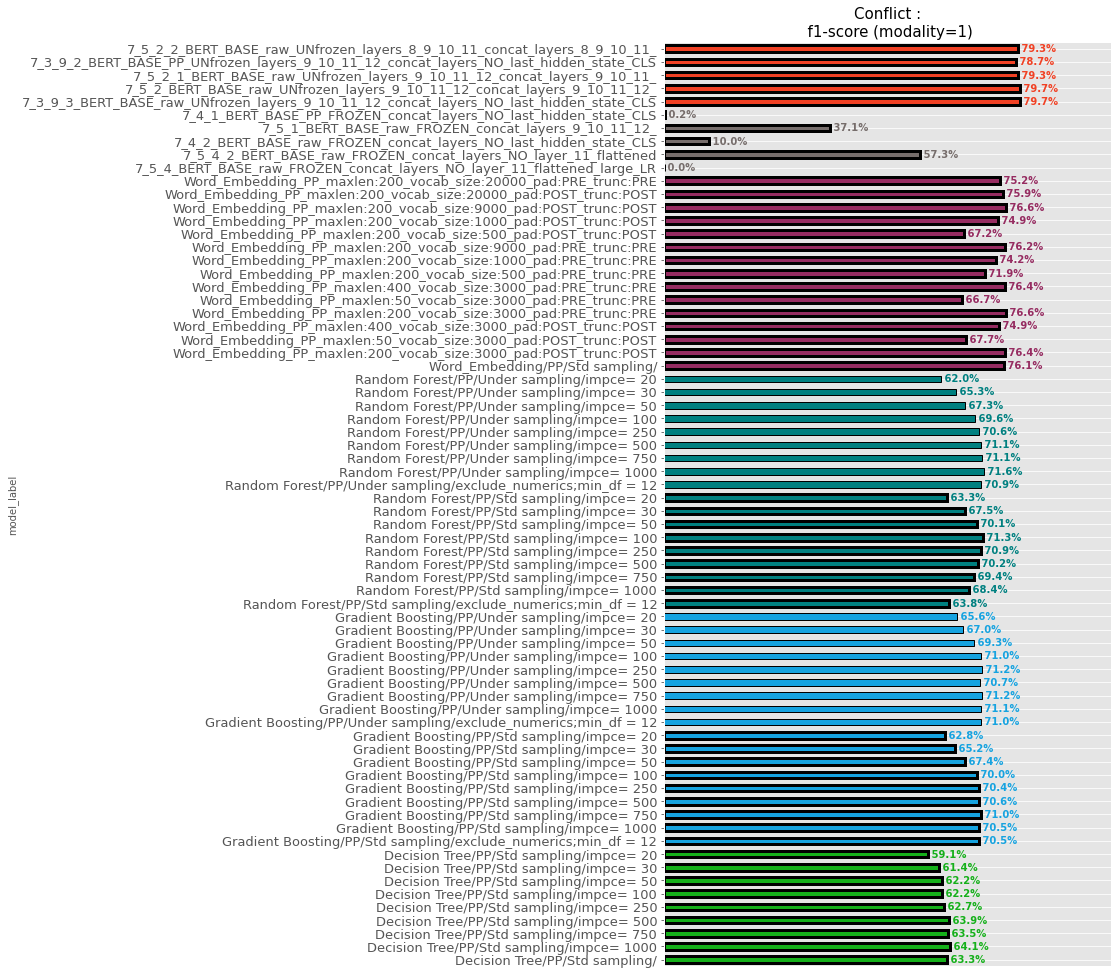

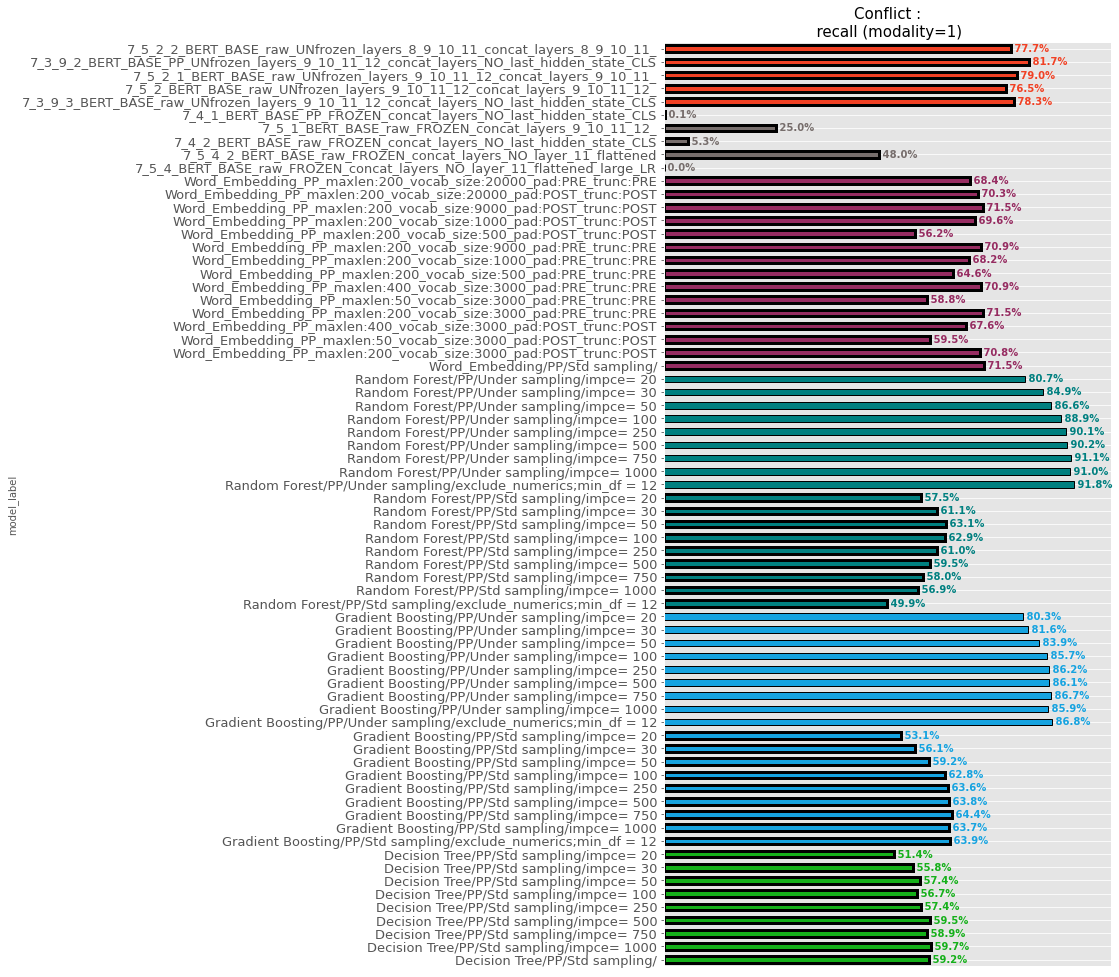

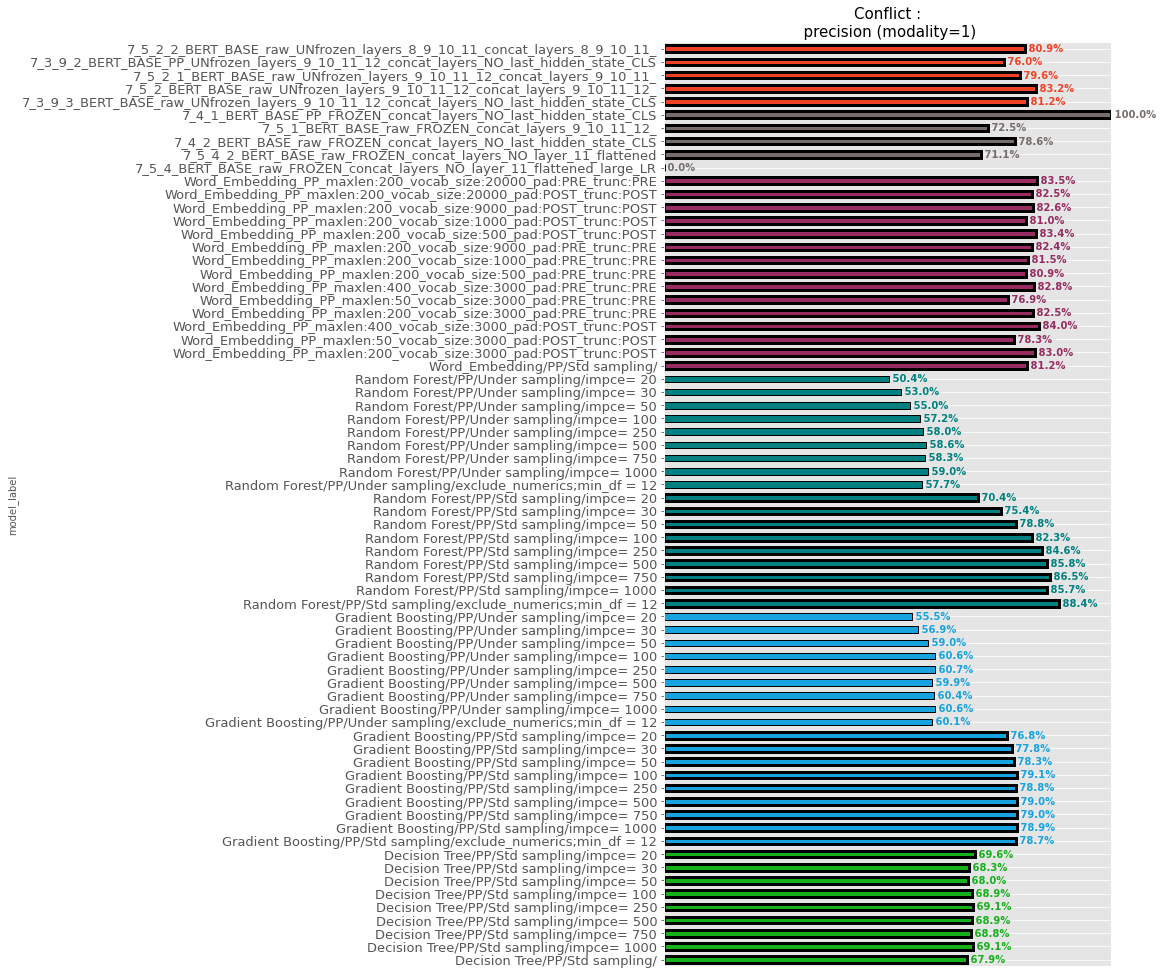

In [ ]:
#anomaly='Anomaly_Aircraft Equipment'
anomaly='Anomaly_Conflict'
plot_metric_universal(df_model_results=model_results,anomaly_list=[anomaly],metric="f1-score",dict_model_color=dict_model_color)
plot_metric_universal(df_model_results=model_results,anomaly_list=[anomaly],metric="recall",dict_model_color=dict_model_color)
plot_metric_universal(df_model_results=model_results,anomaly_list=[anomaly],metric="precision",dict_model_color=dict_model_color)

### Function plot 1 model, all anomalies

In [ ]:
def plot_1_model_all_label_scores(df_model_results,anomaly_list=[],metric="f1-score",dict_model_color={}):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics : "precision", "recall", "f1-score" or "support"
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
    
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    model_label_list=df_model_results['model_label'].unique().tolist()

    for model_label in model_label_list :
  
      # Anomaly_label without the prefix "Anomaly_"
      
      # anomaly_label=anomaly.replace("Anomaly_", "")  
      
      modality_col='1'
      metric_row=metric
      title_ToPlot = model_label + " :\n  "+ metric+" (modality=1) "

      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['model_label'] == model_label) & (df_model_results['metric'] == metric_row)].copy()
      
      # label of the model , including options
      sub_df = sub_df.set_index('anomaly')
      sub_df = sub_df.sort_index()

      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
      sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
      sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)

      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize

      
      num_classes = len(sub_df)
      fig_shape=(8,num_classes//4)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=fig_shape) # old value: (8,25)
      if metric!="support":
        plt.xlim([0,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                  " "+str(round(v*100,1))+"%", 
                  color=c, 
                  va='center', 
                  fontweight='bold')
      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')

#### Definition of the df to plot for BERT models

In [ ]:
# Root label (source = ASRS coding forms) : order = by descending frequency
Anomaly_RootLabels=['Deviation / Discrepancy - Procedural',
                    'Aircraft Equipment',
                    'Conflict',
                    'Inflight Event / Encounter',
                    'ATC Issue',
                    'Deviation - Altitude',
                    'Deviation - Track / Heading',
                    'Ground Event / Encounter',
                    'Flight Deck / Cabin / Aircraft Event',
                    'Ground Incursion',
                    'Airspace Violation',
                    'Deviation - Speed',
                    'Ground Excursion',
                    'No Specific Anomaly Occurred']

In [ ]:
# Dictionnary of old / new values of Anomaly labels 
dict_anomaly_label_ordered={}
for i,anomaly_rl in enumerate(Anomaly_RootLabels):
  col='Anomaly_' + anomaly_rl
  col_order='Anomaly_' +str(np.where(i+1<10,'0',''))+str(i+1)+'_'+ anomaly_rl
  dict_anomaly_label_ordered[col]=col_order

In [ ]:
# Definition of the df to plot : model_results_multilabel_BERT_select_toplot
model_results_multilabel_BERT_select_toplot=model_results_multilabel_BERT_select.copy()
model_results_multilabel_BERT_select_toplot['anomaly']=model_results_multilabel_BERT_select_toplot['anomaly'].replace(dict_anomaly_label_ordered)

#### f1-score

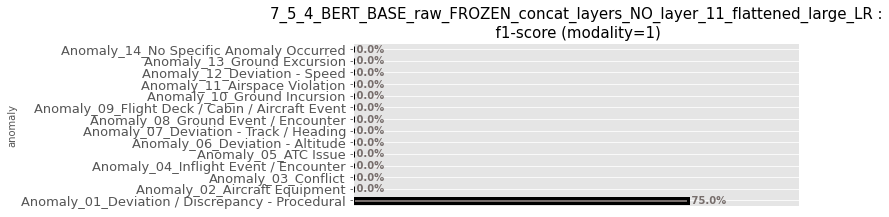

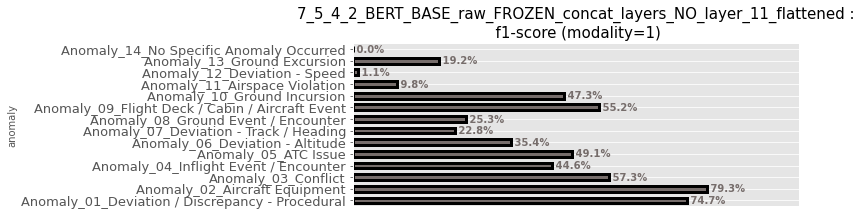

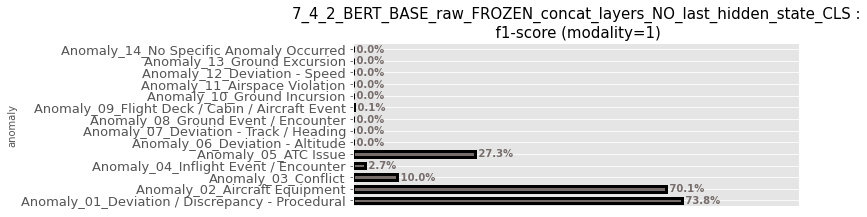

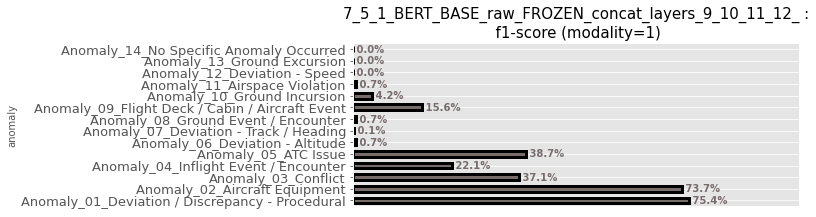

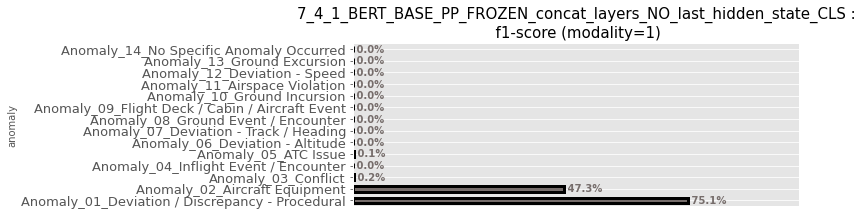

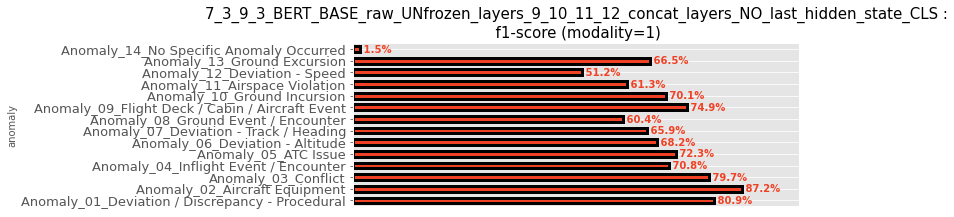

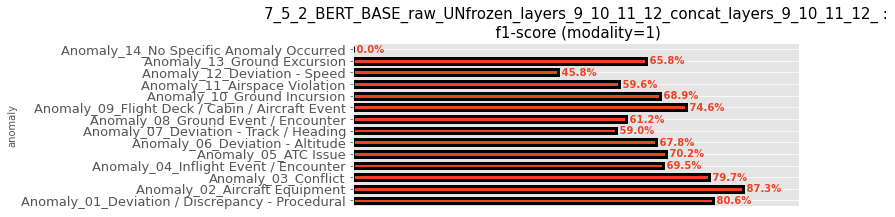

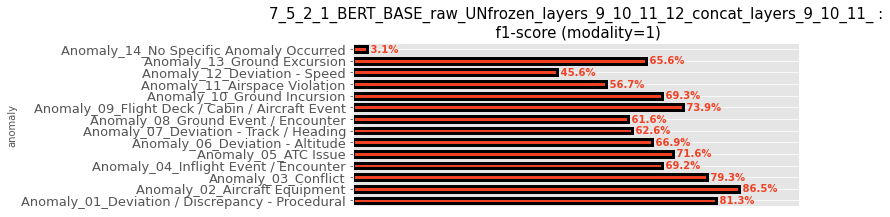

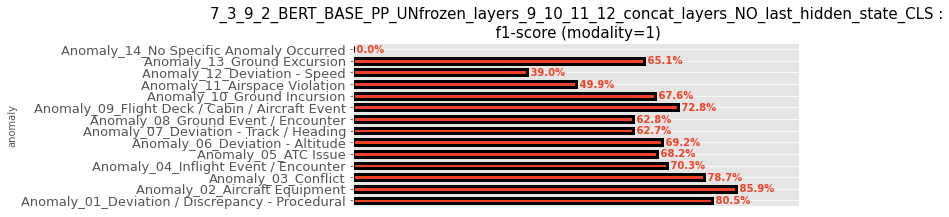

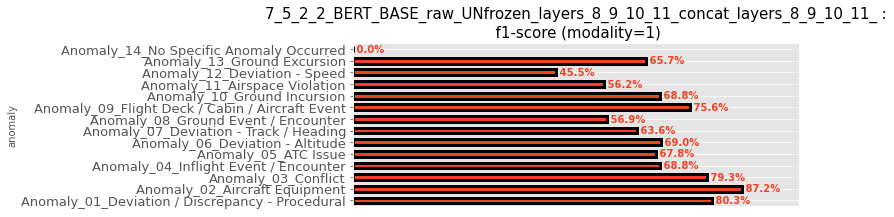

In [ ]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_multilabel_BERT_select_toplot,
                      metric = "f1-score",
                      dict_model_color = dict_model_color)

#### recall

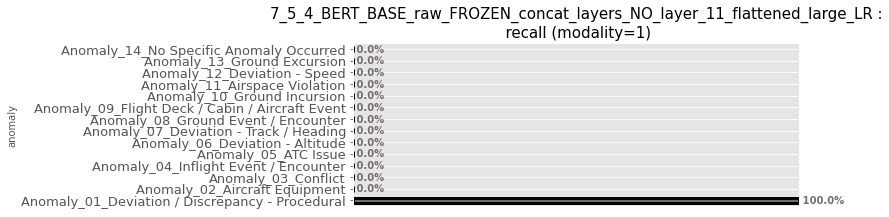

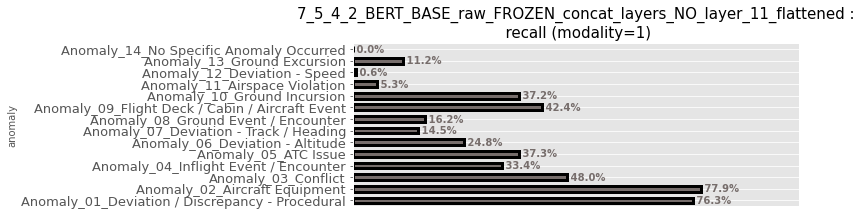

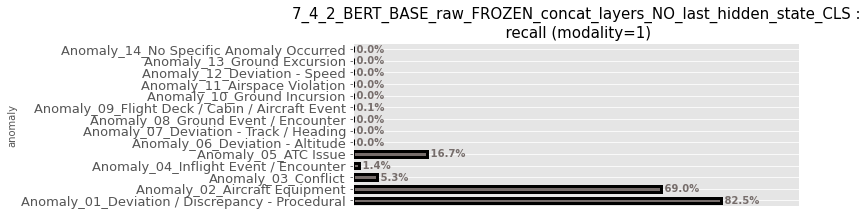

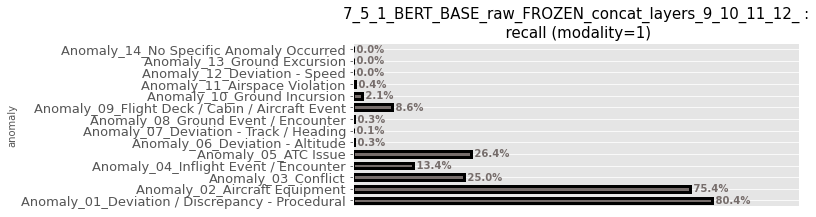

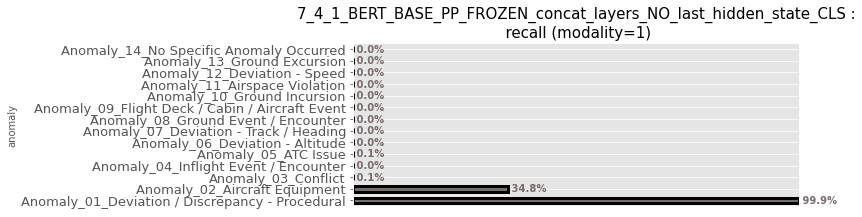

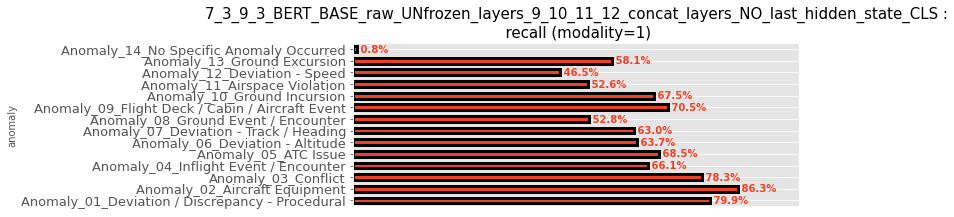

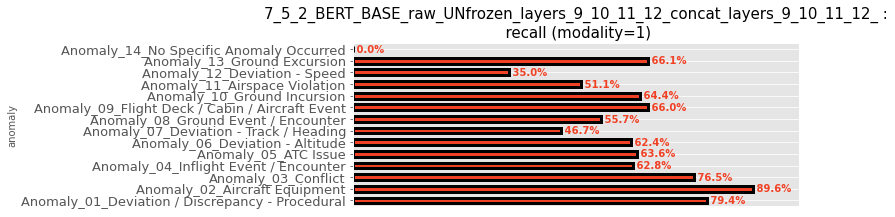

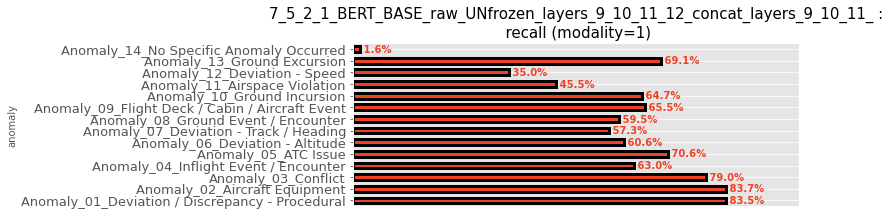

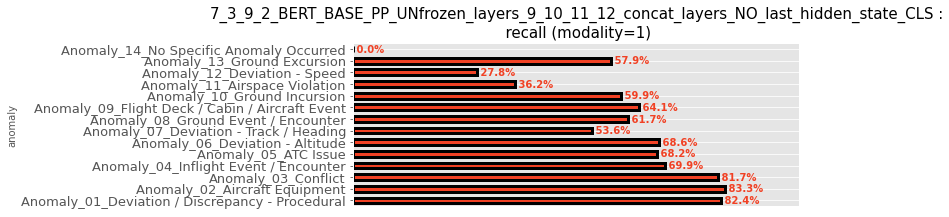

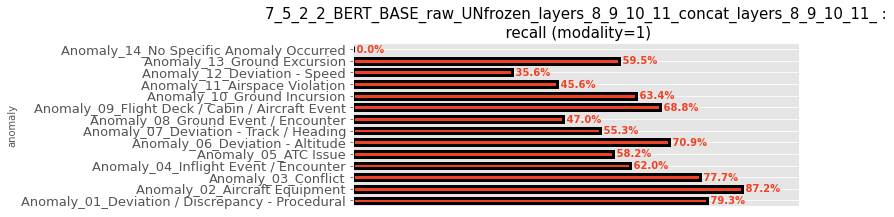

In [ ]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_multilabel_BERT_select_toplot,
                      metric = "recall",
                      dict_model_color = dict_model_color)

#### precision

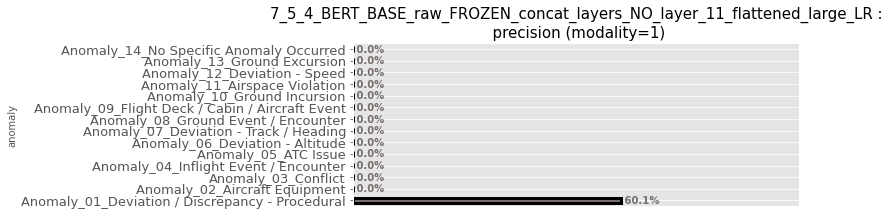

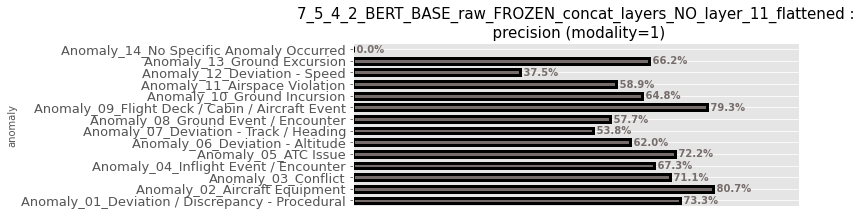

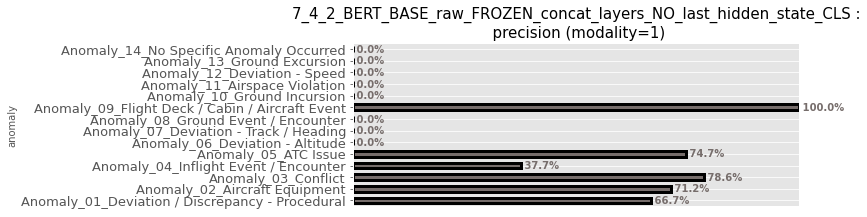

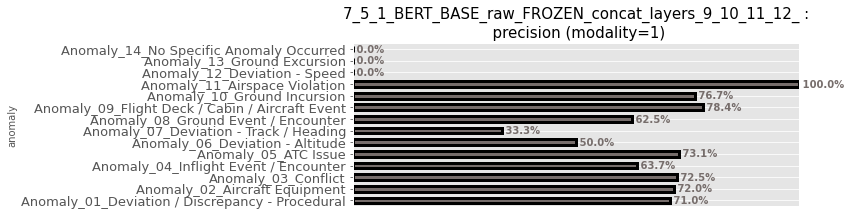

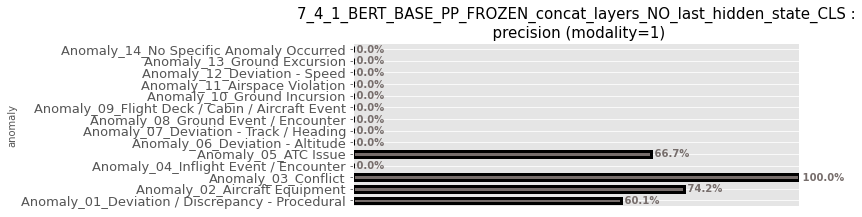

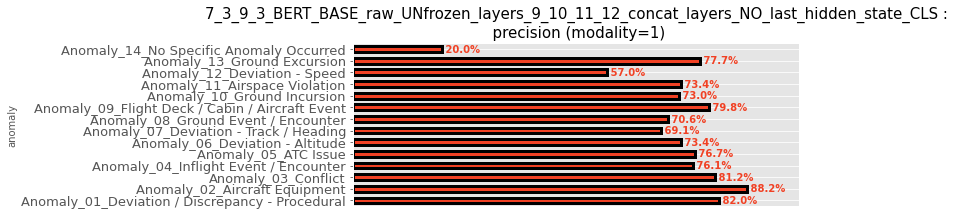

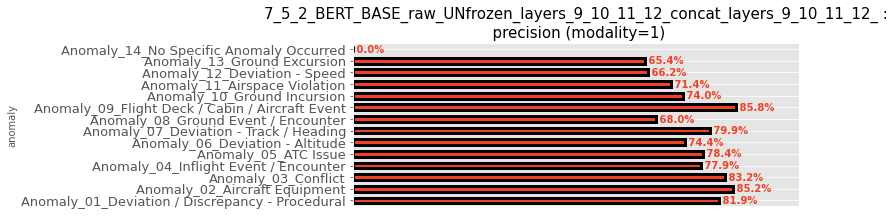

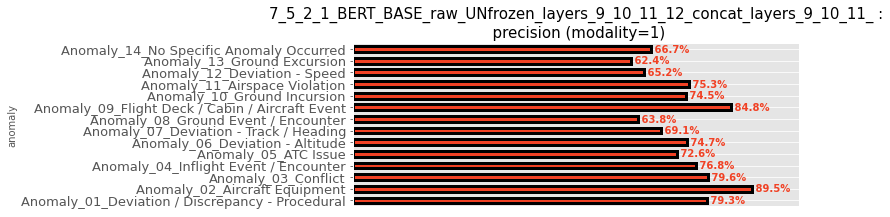

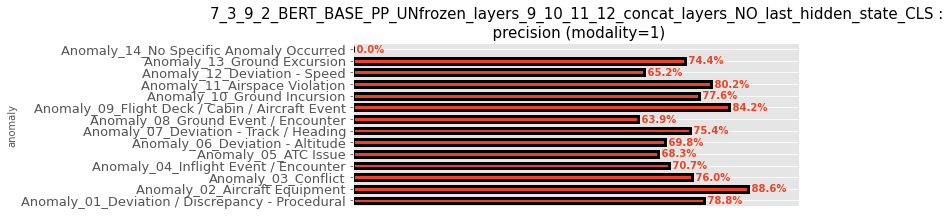

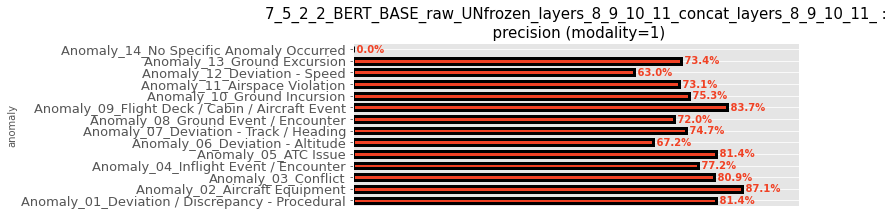

In [ ]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_multilabel_BERT_select_toplot,
                      metric = "precision",
                      dict_model_color = dict_model_color)

# OBSERVATIONS

as of 14.09.2022:

* the model with 'large_LR' at the end was not well trained, due to too large learning rate
* **RAW vs. PP-stemmed** narratives: cf. 7_3_9_2 (PP) and 7_3_9_3 (raw). Raw is higher for f1-score for most labels, but often lower for precision or recall !

**f1-score**
* 4 BERT models stand out by showing high scores, in contrast to the other models that have vanishing scores for low-populated Anomaly labels:
  * 7_5_2_BERT_BASE_raw_UNfrozen_layers_9_10_11_12_concat_layers_9_10_11_12
  * 7_5_2_1_BERT_BASE_raw_UNfrozen_layers_9_10_11_12_concat_layers_9_10_11
  * 7_5_2_2_BERT_BASE_raw_UNfrozen_layers_8_9_10_11_concat_layers_8_9_10_11
  * 7_3_9_2_BERT_BASE_PP_UNfrozen_layers_9_10_11_12_concat_layers_NO_last_hidden_state_CLS

  All these models have in common the fact that we unfroze the last 4 layers. 
  Comparing these models to the **frozen** model 7_5_1_BERT_BASE_raw_UNfrozen_layers_NO_concat_layers_9_10_11_12 (as well as to the other frozen models 7_4_1 and 7_5_4), 
  we conclude that unfreezing BERT's layers is necessary in our project.

* among the 4 UNfrozen models above, which delivers the top score, varies at each anomaly --> see plots '1 model, all labels'. 7_3_9_3 has the best for anomaly 'Speed'

* in terms of f1-score, BERT models outperform all the other models for all anomaly labels


**recall**
* BERT models always (?) outperform WordEmbedding models
* /!\ 7_4_1 and 7_5_4 yield 100% for Anomaly Procedural ?! These models class all data as '1', thus recall is 100% and precision corresponds to the percentage of the distribution of the labels. 
However (see 'Conflict') if you predict '0' for everyone, the f1-score is '0' too. 

* Random Forest **WITH undersampling** outperform BERT models for all anomalies except Aircraft Equipment (and Procedural, if we believe the 100% <-- WE SHOULDN'T ). But the precision is lower for Random Forest in these cases!

* For some anomalies, Gradient Boosting with UnderSampling outperforms BERT. But the Precision is lower in these cases!

**precision**
* WordEmbedding models outperform BERT models



# NEXT STEPS
**PLOTTING**

* plot the probability distributions of the models that have recall = 100% --> Ioannis plotted 
```
2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR
```
in
`8_1_2_Plot_y_pred_probabilities_20220917.ipynb`.
See the multilabel conf_mat: there is no enty under predicted labels == 1; the model puts everyone into '0'.



**Additional BERT model training:**

* run frozen model 7_7_1 using the 11th layer output (not flattened). The flattened one already showed rel. good results...

* run UNfrozen model using the 11th layer output (not flattened)

* use google/bert_uncased_L-12_H-256_A-4
which has N_emb = 256, a value close to 200, that you used in your WordEmbedding model

* instead of concatenation, try sum the 4 last layers?

**OTHER**
* SHAP analysis on BERT

* 1vsAll with best BERT. Parallelize the process by distributing among 2 notebooks that run in parallel 